In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [4]:
print(tf.__version__)

2.0.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
test_data_dir = './datasets/dog-cat/data/test'
train_data_dir = './datasets/dog-cat/data/train'

In [8]:
img_width = 32
img_height = 32
batch_size = 20

In [9]:
img_width = 32
img_height = 32
batch_size = 20

datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = datagen.flow_from_directory(
    directory = train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    classes=['dogs', 'cats']
)

Found 20000 images belonging to 2 classes.


In [13]:
train_generator.classes # output

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [15]:
validation_generator = datagen.flow_from_directory(
    directory = test_data_dir,
    target_size = (32, 32),
    classes=['dogs', 'cats'],
    batch_size=batch_size,
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


### Building CNN Base Model

In [19]:
model = Sequential()
model.add(Conv2D(
    filters=64,
    kernel_size=(3,3),
    activation='relu',
    padding='same',
    kernel_initializer='he_uniform',
    input_shape=(img_width, img_height, 3) # colorly -> 3, black-white -> 1
))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose = 1
)

Epoch 1/5
1000/1000 [==============================] - 98s 98ms/step - loss: 0.6803 - accuracy: 0.5570 - val_loss: 0.7626 - val_accuracy: 0.3842
Epoch 2/5
1000/1000 [==============================] - 95s 95ms/step - loss: 0.5920 - accuracy: 0.6834 - val_loss: 1.1030 - val_accuracy: 0.2808
Epoch 3/5
1000/1000 [==============================] - 100s 100ms/step - loss: 0.5262 - accuracy: 0.7394 - val_loss: 1.3624 - val_accuracy: 0.2948
Epoch 4/5
1000/1000 [==============================] - 92s 92ms/step - loss: 0.4830 - accuracy: 0.7665 - val_loss: 1.5630 - val_accuracy: 0.2478
Epoch 5/5
1000/1000 [==============================] - 96s 96ms/step - loss: 0.4429 - accuracy: 0.7897 - val_loss: 1.6072 - val_accuracy: 0.2508


In [25]:
history.history

{'loss': [0.6803001478016376,
  0.5920251298844814,
  0.5262115686684847,
  0.4829552063047886,
  0.4429374219626188],
 'accuracy': [0.55705, 0.68335, 0.73935, 0.7665, 0.78965],
 'val_loss': [0.7626011748313903,
  1.1030008647441865,
  1.3624380493164063,
  1.5629662575721741,
  1.607176233291626],
 'val_accuracy': [0.3842, 0.2808, 0.2948, 0.2478, 0.2508]}

In [26]:
def plot_learningCurve(history):
    # Plot training & validation accuracy values
    epoch_range = range(1, 6)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

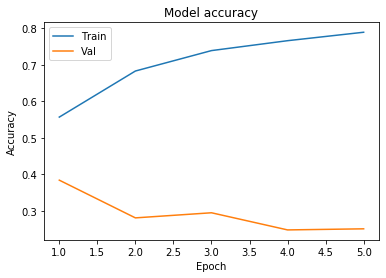

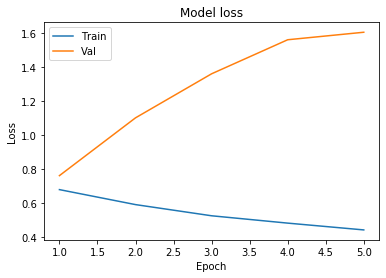

In [27]:
plot_learningCurve(history)

## Impliment First 3 Blocks of VGG16 Model